In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:25pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:21pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

- 공공데이터(data.go.kr) 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터와 범주형데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [44]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_file = 'C:/Windows/Fonts/HMKMMAG.TTF'
# font_name = fm.FontProperties(fname=font_file,
#                              size=15
#                              ).get_name()
# plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='default')
# warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [6]:
%ls "d:/ai_x/download/shareData/부동산_250213/"

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: BE7A-ADFF

 d:\ai_x\download\shareData\부동산_250213 디렉터리

2025-04-30  오후 04:55    <DIR>          .
2025-04-30  오후 04:55    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 04:55           412,540 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
               2개 파일             414,703 바이트
               2개 디렉터리  491,807,956,992 바이트 남음


In [9]:
df_first = pd.read_csv('d:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
11,충남,6365,6365,6379,6287,6552,6591,6644,6805,6914,...,6940,6989,6976,6980,7161,7017,6975,6939,6935,6942


In [10]:
df_first.shape # 17행22열

(17, 22)

In [12]:
pd.options.display.max_columns = 22
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [17]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [18]:
# isna(), isnull() : 결측치 여부
# notna(), notnull() : 결측치가 아닌지 여부
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [21]:
# set_index('열이름') : 열을 index로 settting
# reset_index() : index를 열로 setting
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

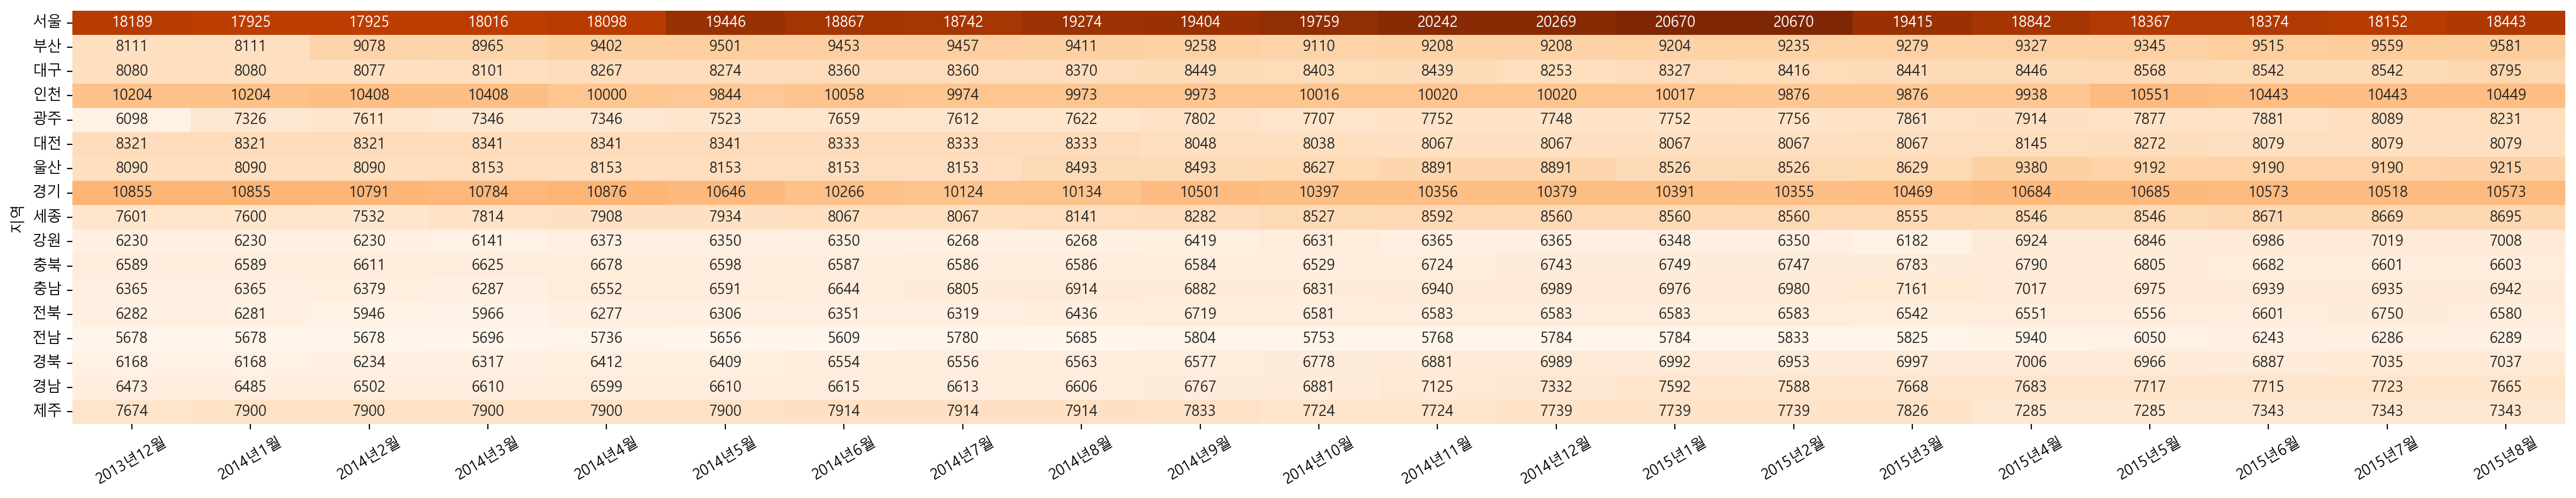

In [51]:
df_first.head()
plt.figure(figsize=(30, 5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xticks(rotation=30)
plt.show()

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, ' ', '   ', 8111 -> np.nan, ' ', '   ', 8111, "8,111"

In [125]:
#  ★ 
ex = pd.read_csv('d:/ai_x/download/shareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [58]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체 갯수 :', ex.shape[0])
print('결측치 아닌 갯수 :', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 :', ex['분양가격(제곱미터)'].isna().sum())

전체 갯수 : 9095
결측치 아닌 갯수 : 8481
결측치 갯수 : 614


In [61]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isnull()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [64]:
type(ex.loc[368, '분양가격(제곱미터)']), type(ex.loc[0, '분양가격(제곱미터)'])

(float, str)

In [68]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64') # 에러 이유 : '  '
# pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce') # 예러나는 행은 NaN로 
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce').isna().sum()

740

In [74]:
# 분양가격(제곱미터) 컬럼이 space인 행 : 740-614=126개
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,


In [79]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
ex.loc[0] # 분양가격이 정상

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [119]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    # np.isnan(스칼라변수) : 스칼라변수가 결측치(np.nan)인지 여부
    # pd.isna(스칼라변수) : 스칼라변수가 결측치(np.nan, None)인지 여부
    # pd.notnull(스칼라변수) : 결측치가 아닌지 여부
    # 1차원이나2차원변수.isna() : 결측치 여부
    if pd.notnull(price) and price.strip()!='':
        return len(price)
    else:
        return 0
    
get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])

(0, 0, 4)

In [126]:
#  ★  자리수열 추가
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [89]:
ex.자리수.unique()

array([4, 0, 5], dtype=int64)

In [127]:
# index 이름 idx로
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [128]:
# ★ index를 열로
ex = ex.reset_index()
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [102]:
# 자리수가 5이면서 idx가 5의 배수 : 8245번째
ex[(ex.자리수 == 5) & (ex.idx%5==0)].head(1)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
8245,8245,서울,모든면적,2023,11,10347,5


In [ ]:
# 컴마추가안 함 : nanex, spaceex, ex.loc[1]
# 컴마추가 : ex.loc[0], ex.loc[8245]

In [114]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space

In [113]:
# 2022년 데이터 흉내내기 위한 함수:매개변수로 row를 받아 nan, ' ', '  ', '5123', '5,123' return
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5==0) & (row.자리수>=4):
        price = price[:-3] + ',' + price[-3:]
    return price
    
comma_append(nanex), comma_append(spaceex), comma_append(ex.loc[1]),\
comma_append(ex.loc[0]), comma_append(ex.loc[8245])

(nan, '  ', '5652', '5,841', '10,347')

In [129]:
# ★ 컴마 추가 - 1번만 실행
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)

In [130]:
ex.head(6)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,"5,841",4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,서울,전용면적 102제곱미터초과,2015,10,5879,4
5,5,인천,모든면적,2015,10,"3,163",4


In [133]:
ex.drop(['idx','자리수'], axis=1, inplace=True)

In [135]:
# 간헐적으로 평당분양가에 ,가 있거나(5개마다) np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/전국제곱미터당분양가격(2015년10월부터).csv', 
          # encoding='cp949',
          # sep='\t'
          index=False)

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [137]:
df_last = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
display(df_last.head(1))
print(df_last.shape)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"


(9095, 5)


In [138]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [139]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [140]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [145]:
# df_last['분양가격(제곱미터)'].astype(np.float64)*3.3
# df_last['분양가격(제곱미터)'].str.replace(',','').astype(np.float64)
# ,와 space때문에 에러
pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce') # 비추

0          NaN
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090       NaN
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply

In [146]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [152]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
print(tempsplited)
print(''.join(tempsplited))

['12', '523']
12523


In [160]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price): # np.nan이거나 None인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() == '': # space면 np.nan로
        row['제곱미터분양가격'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        # row['분양가격(제곱미터)'] = price.replace(',','')
        row['제곱미터분양가격'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row
    
commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터분양가격                          NaN
Name: 368, dtype: object

In [164]:
%%time
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.head(2)

CPU times: total: 844 ms
Wall time: 883 ms


,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652


In [166]:
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

In [167]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


### map

In [168]:
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
1310,울산,모든면적,2017,1,"3,260"


In [173]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    #if price is np.nan:
    #if np.isnan(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [176]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950.0


In [177]:
df_last.dtypes

지역명            object
규모구분           object
연도              int64
월               int64
분양가격(제곱미터)     object
제곱미터당분양가격     float64
dtype: object

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [ ]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

## (3) 전용면적별 평당분양가격(평균)

## (4) 지역별, 전용면적별 평당분양가격(평균)

## (5) 연도, 지역별 평당분양가격(평균)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

## (2) 지역별 평당분양가격 (line, bar)

## (3) 전용면적별 평당분양가격(barplot)

## (4) 연도별 평균 평당분양가격(line)

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
